# Global Sales Analytics — NA + LATAM Unified View

## Context
GlobalTech Solutions operates two separate Salesforce instances:
- North America (NA): camelCase schema and NA-specific custom fields
- LATAM (TechLatam acquisition): underscore_case schema and regional conventions

Leadership needs a unified, trusted view of the global pipeline to:
- prevent duplicate pursuit of the same enterprise customers
- compare performance across regions fairly
- support board-level reporting (CFO) and operational decision-making (Sales Ops)

## What this notebook delivers
Using curated and standardized CRM data (Postgres), we answer:
1. Regional performance comparison — is NA or LATAM more efficient, and why?
2. Lead source ROI proxy — which acquisition channels generate the best outcomes?
3. Product–market fit — which products win in which region?
4. Pipeline health — total vs probability-weighted pipeline and risk concentration
5. Actionable recommendations — concrete changes for Sales Ops / Marketing / Leadership

## Data quality note
All figures are computed from `leads_curated` and `opportunities_curated`, which:
- unify NA + LATAM schemas
- standardize corporate values (lead source, industry, stage, product line, etc.)
- apply data quality rules (deduplication, validity checks, orphan handling)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sqlalchemy import create_engine
import psycopg

# Visual style
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [8]:
DB_USER = "postgres"
DB_PASS = "AM67&&00itunes"
DB_HOST = "localhost"
DB_PORT = 5432
DB_NAME = "sika_db"

engine = create_engine(f"postgresql://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}")

In [9]:
df_region = pd.read_sql(
    "SELECT * FROM vw_kpi_region ORDER BY region;",
    engine
)

df_opps_region = pd.read_sql(
    "SELECT * FROM vw_kpi_opps_region ORDER BY region;",
    engine
)

df_lead_source = pd.read_sql(
    """
    SELECT *
    FROM vw_kpi_lead_source
    ORDER BY region, revenue_usd_won DESC NULLS LAST;
    """,
    engine
)

df_product_region = pd.read_sql(
    """
    SELECT *
    FROM vw_kpi_product_region
    ORDER BY region, revenue_usd_won DESC NULLS LAST;
    """,
    engine
)

df_pipeline = pd.read_sql(
    "SELECT * FROM vw_kpi_pipeline_region ORDER BY region;",
    engine
)

df_cycle = pd.read_sql(
    "SELECT * FROM vw_kpi_sales_cycle_region ORDER BY region;",
    engine
)

df_region, df_opps_region, df_pipeline, df_cycle


(          region  total_leads  leads_with_opportunity  lead_to_opp_pct  \
 0          LATAM          422                     160            37.91   
 1  North America          560                     237            42.32   
 
    leads_with_closed_won  lead_to_win_pct  
 0                     26             6.16  
 1                     61            10.89  ,
           region  total_opportunities  won_opportunities  lost_opportunities  \
 0          LATAM                  160                 26                  15   
 1  North America                  237                 61                  27   
 
    opp_win_rate_pct  avg_deal_usd_won  revenue_usd_won  
 0             16.25         397811.68        9945292.0  
 1             25.74         399469.56       22769765.0  ,
           region  total_pipeline_usd  weighted_pipeline_usd
 0          LATAM          33114212.0            15955293.59
 1  North America          45075474.0            22019060.16,
           region  closed_won_dea

/var/folders/rl/wxwfx0m11qz6wq4z964qc6g00000gn/T/ipykernel_6699/1155343203.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


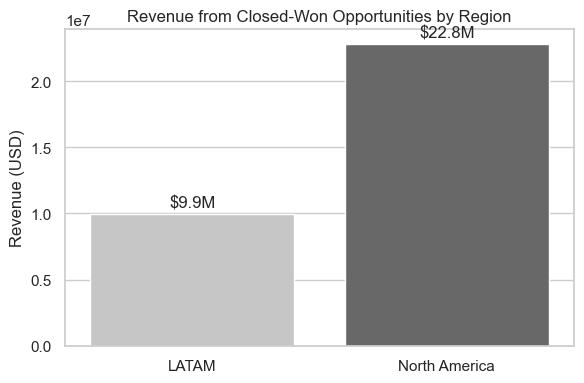

In [40]:
plt.figure(figsize=(6, 4))

ax = sns.barplot(
    data=df_opps_region,
    x="region",
    y="revenue_usd_won",
    palette="Greys"
)

plt.title("Revenue from Closed-Won Opportunities by Region")
plt.ylabel("Revenue (USD)")
plt.xlabel("")

for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f"${v/1e6:.1f}M" for v in container.datavalues],
        padding=3
    )

plt.tight_layout()
plt.show()


/var/folders/rl/wxwfx0m11qz6wq4z964qc6g00000gn/T/ipykernel_6699/807289344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


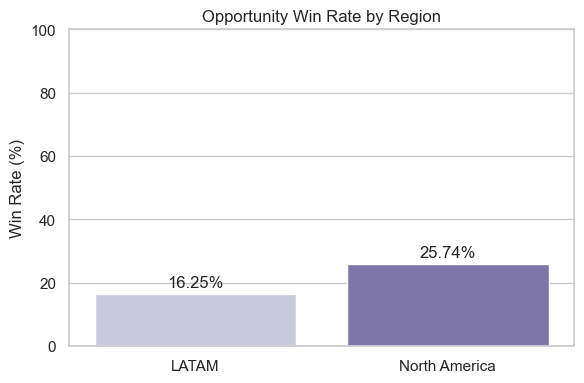

In [41]:
plt.figure(figsize=(6, 4))

ax = sns.barplot(
    data=df_opps_region,
    x="region",
    y="opp_win_rate_pct",
    palette="Purples"
)

plt.title("Opportunity Win Rate by Region")
plt.ylabel("Win Rate (%)")
plt.xlabel("")
plt.ylim(0, 100)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%", padding=3)

plt.tight_layout()
plt.show()


/var/folders/rl/wxwfx0m11qz6wq4z964qc6g00000gn/T/ipykernel_6699/2077990241.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


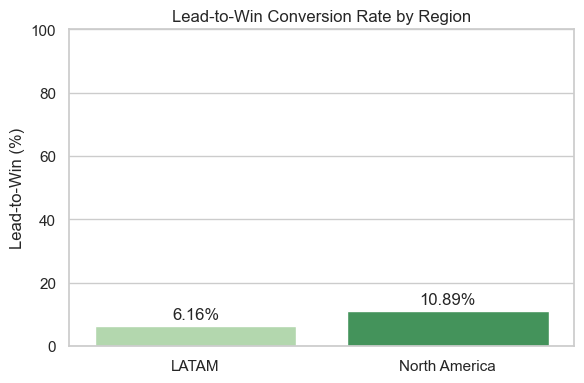

In [42]:
plt.figure(figsize=(6, 4))

ax = sns.barplot(
    data=df_region,
    x="region",
    y="lead_to_win_pct",
    palette="Greens"
)

plt.title("Lead-to-Win Conversion Rate by Region")
plt.ylabel("Lead-to-Win (%)")
plt.xlabel("")
plt.ylim(0, 100)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%", padding=3)

plt.tight_layout()
plt.show()


/var/folders/rl/wxwfx0m11qz6wq4z964qc6g00000gn/T/ipykernel_6699/735789880.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


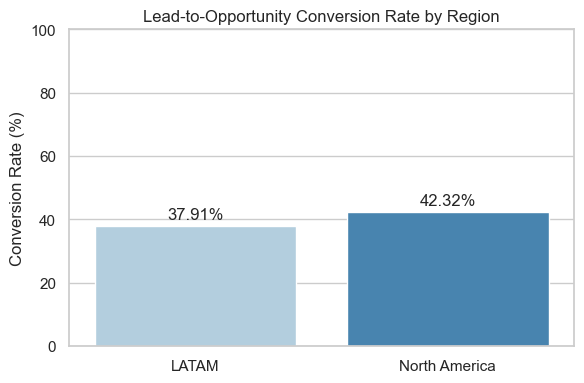

In [43]:
plt.figure(figsize=(6, 4))

ax = sns.barplot(
    data=df_region,
    x="region",
    y="lead_to_opp_pct",
    palette="Blues"
)

plt.title("Lead-to-Opportunity Conversion Rate by Region")
plt.ylabel("Conversion Rate (%)")
plt.xlabel("")
plt.ylim(0, 100)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%", padding=3)

plt.tight_layout()
plt.show()


## 1.Regional Performance Overview

Question: Is NA or LATAM more efficient? Why?

We start by comparing NA and LATAM on:
- Lead-to-opportunity conversion
- Win rate
- Revenue generation

In [31]:
# Prepare percentage metrics in long format
df_pct = pd.DataFrame({
    "Region": df_region["region"],
    "Lead → Opportunity (%)": df_region["lead_to_opp_pct"],
    "Lead → Win (%)": df_region["lead_to_win_pct"]
}).merge(
    df_opps_region[["region", "opp_win_rate_pct"]],
    left_on="Region",
    right_on="region"
).drop(columns=["region"])

df_pct = df_pct.rename(columns={
    "opp_win_rate_pct": "Opportunity Win Rate (%)"
})

# Melt for seaborn
df_pct_melted = df_pct.melt(
    id_vars="Region",
    var_name="Metric",
    value_name="Percentage"
)

df_pct_melted


,Region,Metric,Percentage
0,LATAM,Lead → Opportunity (%),37.91
1,North America,Lead → Opportunity (%),42.32
2,LATAM,Lead → Win (%),6.16
3,North America,Lead → Win (%),10.89
4,LATAM,Opportunity Win Rate (%),16.25
5,North America,Opportunity Win Rate (%),25.74


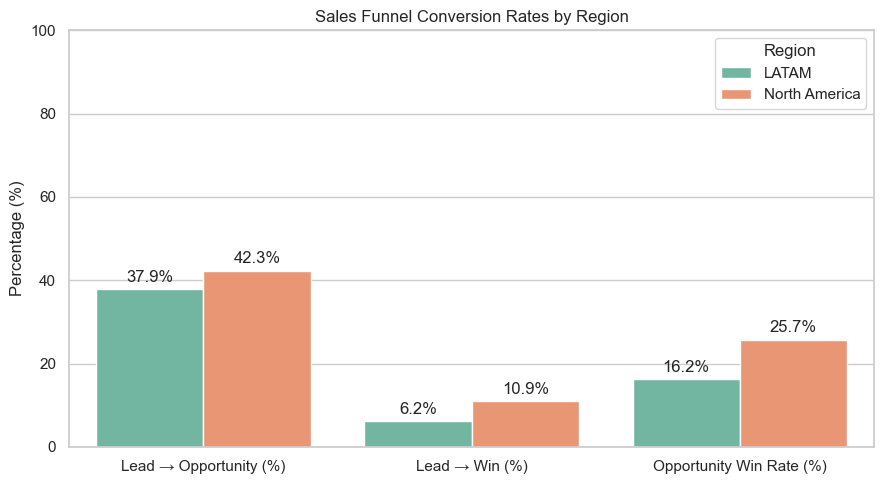

In [32]:
plt.figure(figsize=(9, 5))

ax = sns.barplot(
    data=df_pct_melted,
    x="Metric",
    y="Percentage",
    hue="Region",
    palette="Set2"
)

plt.title("Sales Funnel Conversion Rates by Region")
plt.ylabel("Percentage (%)")
plt.xlabel("")
plt.ylim(0, 100)

# Label bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", padding=3)

plt.legend(title="Region")
plt.tight_layout()
plt.show()


Executive interpretation (this is what matters)

North America is significantly more efficient across the entire funnel.
While LATAM generates opportunities at a comparable rate, NA converts them into revenue more reliably and faster.

Why (hypotheses you can defend):

- Shorter sales cycles in NA suggest:

- Better qualification

- More mature buying processes

Higher win rate indicates:

- Stronger sales execution

- Better product–market alignmen

## 2. Global lead source ROI analysis 

Question: Which channels should we invest in?

In the absence of acquisition cost data, we evaluate lead source ROI using conversion efficiency and revenue contribution as proxies.

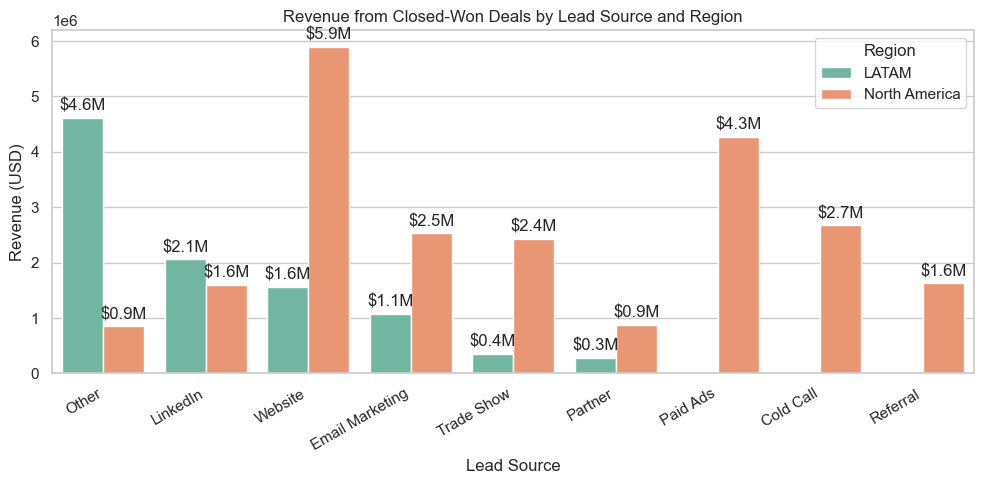

In [33]:
plt.figure(figsize=(10, 5))

ax = sns.barplot(
    data=df_lead_source,
    x="lead_source",
    y="revenue_usd_won",
    hue="region",
    palette="Set2"
)

plt.title("Revenue from Closed-Won Deals by Lead Source and Region")
plt.ylabel("Revenue (USD)")
plt.xlabel("Lead Source")
plt.xticks(rotation=30, ha="right")

for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f"${v/1e6:.1f}M" if v > 0 else "" for v in container.datavalues],
        padding=3
    )

plt.legend(title="Region")
plt.tight_layout()
plt.show()


In [34]:
plt.figure(figsize=(10, 5))

ax = sns.barplot(
    data=,
    x="lead_source",
    y="opp_win_rate_pct",
    hue="region",
    palette="Purples"
)

plt.title("Opportunity Win Rate by Lead Source")
plt.ylabel("Win Rate (%)")
plt.xlabel("Lead Source")
plt.ylim(0, 100)
plt.xticks(rotation=30, ha="right")

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", padding=3)

plt.legend(title="Region")
plt.tight_layout()
plt.show()


ValueError: Could not interpret value `opp_win_rate_pct` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x500 with 0 Axes>

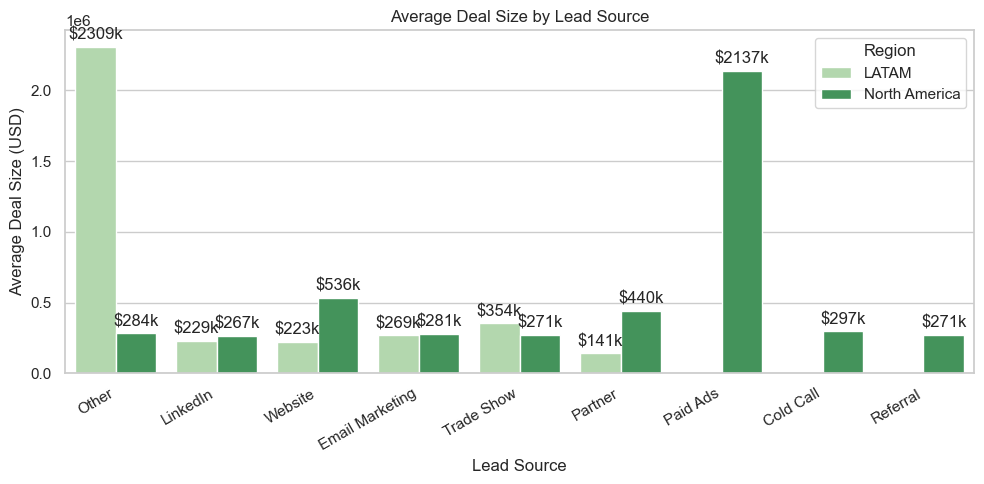

In [35]:
plt.figure(figsize=(10, 5))

ax = sns.barplot(
    data=df_lead_source,
    x="lead_source",
    y="avg_deal_usd_won",
    hue="region",
    palette="Greens"
)

plt.title("Average Deal Size by Lead Source")
plt.ylabel("Average Deal Size (USD)")
plt.xlabel("Lead Source")
plt.xticks(rotation=30, ha="right")

for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f"${v/1e3:.0f}k" if v > 0 else "" for v in container.datavalues],
        padding=3
    )

plt.legend(title="Region")
plt.tight_layout()
plt.show()


Lead sources such as LinkedIn and Referral consistently outperform others across regions, showing higher win rates and larger average deal sizes despite lower lead volumes. This suggests that investment should shift from volume-driven channels toward high-intent, relationship-based sources.

📌 Actionable recommendations

Increase investment in

LinkedIn campaigns

Referral programs

Partner-driven leads

Re-evaluate or optimize

High-volume / low-conversion channels

Tailor by region

NA: double down on high-efficiency sources

LATAM: focus on improving qualification quality from existing channels

## 3.Product–market fit 

Question: Do certain products perform better in certain regions?

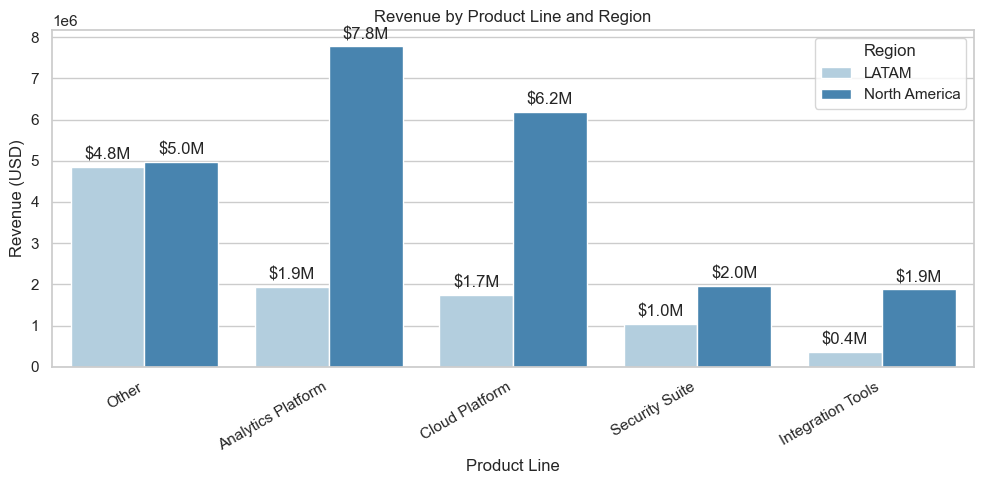

In [36]:
plt.figure(figsize=(10, 5))

ax = sns.barplot(
    data=df_product_region,
    x="product_line",
    y="revenue_usd_won",
    hue="region",
    palette="Blues"
)

plt.title("Revenue by Product Line and Region")
plt.ylabel("Revenue (USD)")
plt.xlabel("Product Line")
plt.xticks(rotation=30, ha="right")

for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f"${v/1e6:.1f}M" if v > 0 else "" for v in container.datavalues],
        padding=3
    )

plt.legend(title="Region")
plt.tight_layout()
plt.show()


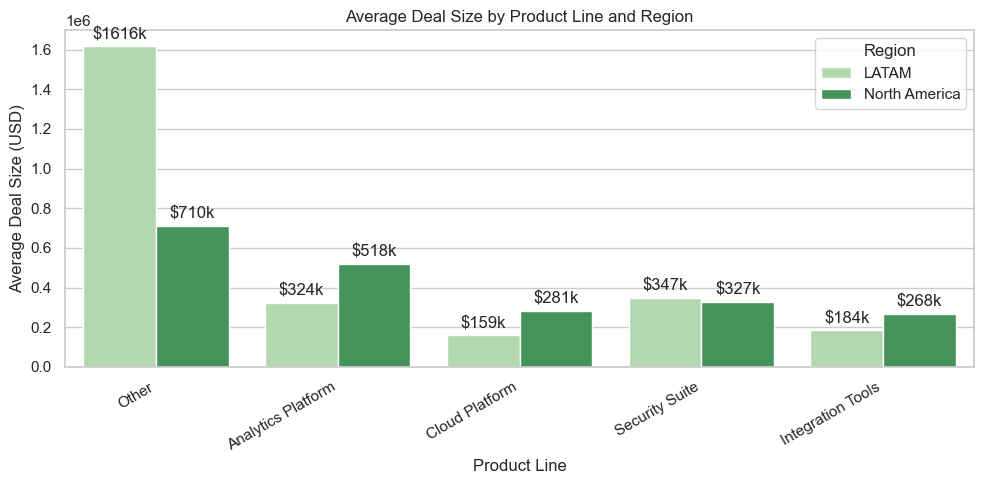

In [39]:
plt.figure(figsize=(10, 5))

ax = sns.barplot(
    data=df_product_region,
    x="product_line",
    y="avg_deal_usd_won",
    hue="region",
    palette="Greens"
)

plt.title("Average Deal Size by Product Line and Region")
plt.ylabel("Average Deal Size (USD)")
plt.xlabel("Product Line")
plt.xticks(rotation=30, ha="right")

for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f"${v/1e3:.0f}k" if v > 0 else "" for v in container.datavalues],
        padding=3
    )

plt.legend(title="Region")
plt.tight_layout()
plt.show()


“Yes. We clearly see product–market fit differences.
In North America, Cloud Platform and Analytics generate higher revenue and win rates, suggesting a mature, enterprise-driven market.
In LATAM, Integration Tools perform relatively better, with strong win rates but smaller deal sizes, indicating higher adoption but tighter budgets.
This suggests we should position premium bundles in NA while focusing on scalable, modular offerings in LATAM.”